#**TASK OVERVIEW**
Home Credit saat ini sedang menggunakan berbagai macam metode statistik dan Machine Learning untuk membuat **prediksi skor kredit**. Sekarang, kami meminta anda untuk membuka potensi maksimal dari data kami. Dengan melakukannya, kita dapat memastikan pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman dapat diberikan dengan principal, maturity, dan repayment calendar yang akan memotivasi pelanggan untuk sukses.

Evaluasi akan dilakukan dengan mengecek seberapa dalam pemahaman analisa yang anda kerjakan. **Sebagai catatan, anda perlu menggunakan setidaknya 2 model Machine Learning dimana salah satunya ada Logistic Regression.**

Setelah itu, buatlah side presentasi yang mengandung analisa hasil pemodelan secara end-to-end beserta rekomendasi bisnisnya (maksimal 10 halaman)


# **Dataset Description**
**1. application_{train|test}.csv**
* This is the main table, broken into two files for Train (with TARGET) and Test(without TARGET).
* Static data for all applications. One row represents one loan in our data sample.

**2. bureau.csv**
* All client's previous credits provided by other financial institutions that were
reported to Credit Bureau (for clients who have a loan in our sample).
* For every loan in our sample, there are as many rows as number of credits the
client had in Credit Bureau before the application date.


**3. bureau_balance.csv**
* Monthly balances of previous credits in Credit Bureau.
* This table has one row for each month of history of every previous credit reported
to Credit Bureau – i.e the table has (#loans in sample * # of relative previous
credits * # of months where we have some history observable for the previous
credits) rows.

**4. POS_CASH_balance.csv**
* Monthly balance snapshots of previous POS (point of sales) and cash loans that
the applicant had with Home Credit.
* This table has one row for each month of history of every previous credit in Home
Credit (consumer credit and cash loans) related to loans in our sample – i.e. the
table has (#loans in sample * # of relative previous credits * # of months in which
we have some history observable for the previous credits) rows.

**5. credit_card_balance.csv**
* Monthly balance snapshots of previous credit cards that the applicant has with
Home Credit.
* This table has one row for each month of history of every previous credit in Home
Credit (consumer credit and cash loans) related to loans in our sample – i.e. the
table has (#loans in sample * # of relative previous credit cards * # of months
where we have some history observable for the previous credit card) rows.

**6. previous_application.csv**
* All previous applications for Home Credit loans of clients who have loans in our
sample.
* There is one row for each previous application related to loans in our data sample.

**7. installments_payments.csv**
* Repayment history for the previously disbursed credits in Home Credit related to
the loans in our sample.
* There is a) one row for every payment that was made plus b) one row each for
missed payment.
* One row is equivalent to one payment of one installment OR one installment
corresponding to one payment of one previous Home Credit credit related to loans
in our sample.

**8. HomeCredit_columns_description.csv**
* This file contains descriptions for the columns in the various data files.
![picture](https://drive.google.com/uc?export=view&id=1IdEjmdsK5rU7ozR-B9oBVabq817K6MXX)








## Import Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Necessary Library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the Data

In [43]:
df_train = pd.read_csv('/content/drive/MyDrive/Dataset/Home Credit/application_train.csv', sep=',')

In [44]:
print('Application train dataset has total %d rows dan %d columns.\n' % df_train.shape)
df_train.head()

Application train dataset has total 307511 rows dan 122 columns.



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Understanding

## Data Types

In [45]:
print('Data types: \n')
df_train.info(verbose=True)

Data types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    in

## Duplicate value check

In [46]:
# Check if there's duplicate value in the dataset
df_train.duplicated().values.any()

False

In [47]:
print('Total Unique ID from the dataset is :', df_train['SK_ID_CURR'].nunique())

Total Unique ID from the dataset is : 307511


## Missing Value

In [48]:
# check for missing value
null = pd.DataFrame(df_train.isnull().sum(), columns=['Total Missing Values']).reset_index()
null['Percentage'] = (null['Total Missing Values']/df_train.shape[0])*100
null['Percentage'] = null['Percentage'].round(2)
null.sort_values(by=['Percentage'], ascending=False)

,index,Total Missing Values,Percentage
76,COMMONAREA_MEDI,214865,69.87
48,COMMONAREA_AVG,214865,69.87
62,COMMONAREA_MODE,214865,69.87
70,NONLIVINGAPARTMENTS_MODE,213514,69.43
56,NONLIVINGAPARTMENTS_AVG,213514,69.43
...,...,...,...
14,NAME_FAMILY_STATUS,0,0.00
13,NAME_EDUCATION_TYPE,0,0.00
12,NAME_INCOME_TYPE,0,0.00
9,AMT_ANNUITY,12,0.00


# Data Preparation

## Data Cleaning

##Missing value handling

In [49]:
# Drop column that has 40% missing value
data = list(null[null['Percentage'] > 40]['index'])
df_train = df_train.drop(columns = data)

In [50]:
# Check after columns drop
null = pd.DataFrame(df_train.isnull().sum(), columns=['Total Missing Values']).reset_index()
null['Percentage'] = (null['Total Missing Values']/df_train.shape[0])*100
null['Percentage'] = null['Percentage'].round(2)
null.sort_values(by=['Percentage'], ascending=False)

,index,Total Missing Values,Percentage
27,OCCUPATION_TYPE,96391,31.35
41,EXT_SOURCE_3,60965,19.83
72,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.50
71,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.50
70,AMT_REQ_CREDIT_BUREAU_MON,41519,13.50
...,...,...,...
32,HOUR_APPR_PROCESS_START,0,0.00
33,REG_REGION_NOT_LIVE_REGION,0,0.00
34,REG_REGION_NOT_WORK_REGION,0,0.00
35,LIVE_REGION_NOT_WORK_REGION,0,0.00


In [51]:
# impute missing values with mode for categorical features

category_columns = df_train.select_dtypes(include=['object']).columns.tolist()
numeric_columns = df_train.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_train:
    if df_train[column].isnull().any():
        if(column in category_columns):
            df_train[column]=df_train[column].fillna(df_train[column].mode()[0])
        else:
            df_train[column]=df_train[column].fillna(df_train[column].median())

In [52]:
# Check after imputation
print('Missing values status:', df_train.isnull().values.any())

Missing values status: False


# Exploratory Data Analysis (EDA)

In [53]:
# Make a copy of train DataFrame
training = df_train.copy()

In [54]:
labeling = {0: "No Payment Difficulties", 1: "Payment Difficulties"}
def decode_label(label):
    return labeling[int(label)]

training['TARGET'] = training['TARGET'].apply(lambda x: decode_label(x))

In [55]:
target_group = (training[['TARGET']]
                .groupby("TARGET")
                .agg(COUNT=("TARGET","count"))
                .sort_values(by=["COUNT"],ascending=False)
                .reset_index()
                )

target_group['Percentage %'] = (target_group['COUNT']/target_group['COUNT'].sum()).round(2)
target_group

,TARGET,COUNT,Percentage %
0,No Payment Difficulties,282686,0.92
1,Payment Difficulties,24825,0.08


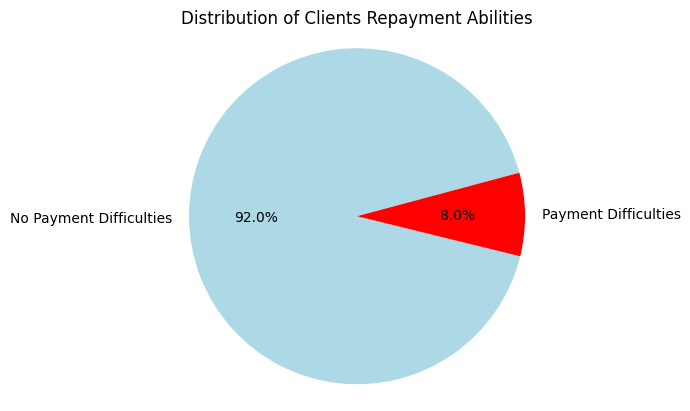

In [56]:
percent = target_group['Percentage %']
label = target_group['TARGET']
colors = ["lightblue", "red"]

plt.pie(percent, labels=label, autopct="%1.1f%%", startangle=15, colors=colors)

plt.title("Distribution of Clients Repayment Abilities")
plt.axis("equal")

plt.show()

92% Clients loan which is equal to about 282K that indicates the client did not had any problems in repaying the loan in given time. While only 8% of the total clients (about 25K applicants) had a problems to repaying the loans.

## Comparison by Gender

In [57]:
training['CODE_GENDER'] = training['CODE_GENDER'].replace(['F','M'],['Female','Male'])

In [58]:
gender_group = training.groupby(by=['CODE_GENDER'], as_index=False)['SK_ID_CURR'].count()
gender_group.rename(columns = {'SK_ID_CURR':'COUNTS'}, inplace = True)
gender_group

,CODE_GENDER,COUNTS
0,Female,202448
1,Male,105059
2,XNA,4


In [59]:
gender_compare = training.groupby(by=['CODE_GENDER','TARGET'], as_index=False)['SK_ID_CURR'].count()
gender_compare.rename(columns = {'SK_ID_CURR':'CLIENTS'}, inplace = True)
print('Clients Repayment Abilities By Gender')
gender_compare.sort_values(by='CLIENTS', ascending=False)

Clients Repayment Abilities By Gender


,CODE_GENDER,TARGET,CLIENTS
0,Female,No Payment Difficulties,188278
2,Male,No Payment Difficulties,94404
1,Female,Payment Difficulties,14170
3,Male,Payment Difficulties,10655
4,XNA,No Payment Difficulties,4


## Comparison by Age

In [60]:
df_train['Age'] = np.floor(df_train['DAYS_BIRTH'] / -365).astype(int)
no_age = df_train[df_train['TARGET']==0]['Age']
yes_age = df_train[df_train['TARGET']==1]['Age']

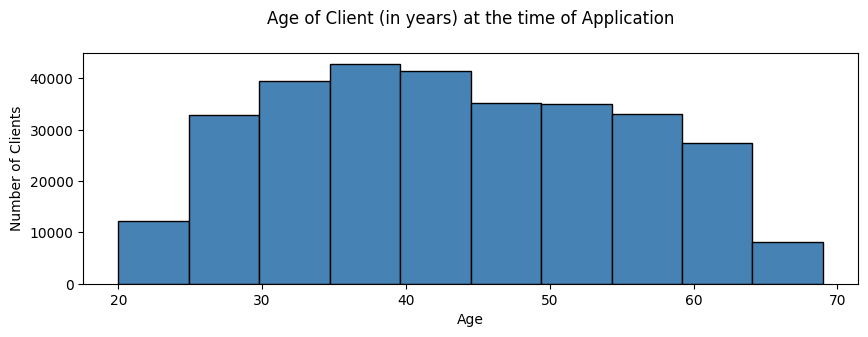

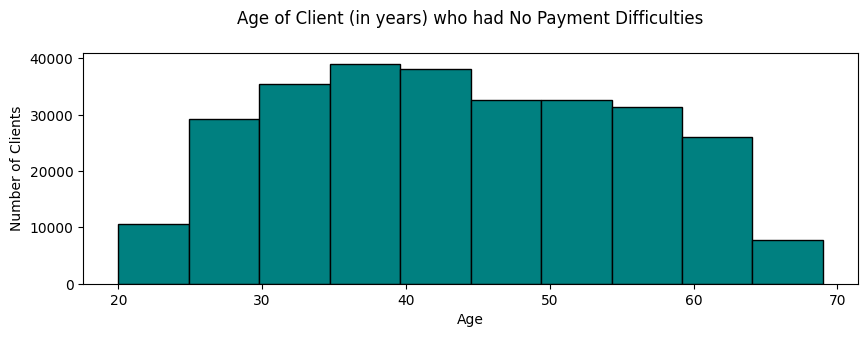

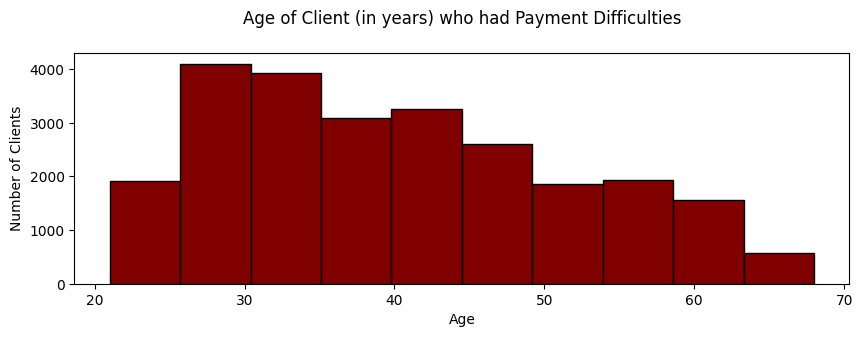

In [61]:
plt.figure(figsize=(10,3))
plt.hist(df_train['Age'], bins=10, edgecolor='black', color='steelblue')
plt.title('Age of Client (in years) at the time of Application\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(no_age, bins=10, edgecolor='black', color='teal')
plt.title('Age of Client (in years) who had No Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(yes_age, bins=10, edgecolor='black', color='maroon')
plt.title('Age of Client (in years) who had Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

* The most number of clients who apply for loans are in the range of 35-40 years old. Meanwhile,the lowest number of applicants are at the age <25 years old and at the age >65 yeard old.

* The most number of clients who have no payment difficulties are client at the age range of 35-45 years old. While the most clients who have payment difficulties are client that at the range of 25-35 years old.

# Machine Learning Models

## Label Encoding

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
# label encoder for columns/features with object type
df_train[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = df_train[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)


In [64]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54


In [65]:
# Change Columns that had negative value to absolute (no negative value)
df_train[['DAYS_BIRTH',
         'DAYS_EMPLOYED',
         'DAYS_ID_PUBLISH',
         'DAYS_REGISTRATION',
         'DAYS_LAST_PHONE_CHANGE']] = df_train[['DAYS_BIRTH',
         'DAYS_EMPLOYED',
         'DAYS_ID_PUBLISH',
         'DAYS_REGISTRATION',
         'DAYS_LAST_PHONE_CHANGE']].abs()

In [66]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54


## Feature Selection

In [67]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [68]:
# Drop unneccessary feature
x = df_train.drop(['TARGET', 'SK_ID_CURR'], axis=1)
y = df_train['TARGET']

In [69]:
# feature selection using Chi Square
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
feature_score = pd.concat([dfcolumns, dfscores], axis = 1)
feature_score.columns = ['Features', 'Score']
print('The features that correlate well with target feature:\n')
feature_score.sort_values(by=['Score'], ascending=False)

The features that correlate well with target feature:



,Features,Score
16,DAYS_EMPLOYED,1.954124e+08
8,AMT_GOODS_PRICE,1.223080e+08
6,AMT_CREDIT,7.669987e+07
15,DAYS_BIRTH,2.235391e+06
5,AMT_INCOME_TOTAL,1.624102e+06
...,...,...
48,FLAG_DOCUMENT_5,3.020010e-02
63,FLAG_DOCUMENT_20,1.425955e-02
65,AMT_REQ_CREDIT_BUREAU_HOUR,1.832008e-03
22,FLAG_CONT_MOBILE,7.863447e-05


## Oversampling

In [70]:
from sklearn.utils import resample

In [71]:
# Split the training data into two different dataframe
df_over = df_train[(df_train['TARGET']==0)]
df_under = df_train[(df_train['TARGET']==1)]

# upsample minority class
df_under_upsampled = resample(df_under,
                                 replace=True,    # sample with replacement
                                 n_samples= 282686, # to match over class
                                 random_state=42)  # reproducible results

# combine majority class with upsampled under class
df_oversample = pd.concat([df_under_upsampled, df_over])

In [72]:
oversample = (df_oversample[['TARGET']]
                .groupby("TARGET")
                .agg(COUNT=("TARGET","count"))
                .sort_values(by=["COUNT"],ascending=False)
                .reset_index()
                )

oversample['Percentage %'] = (oversample['COUNT']/oversample['COUNT'].sum()).round(2)
oversample

,TARGET,COUNT,Percentage %
0,0,282686,0.5
1,1,282686,0.5


0    0.5
1    0.5
Name: Percentage %, dtype: float64

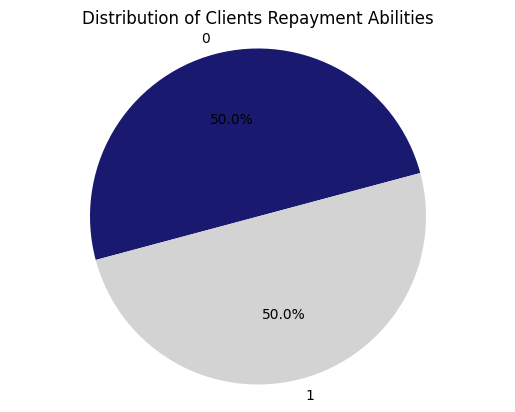

In [73]:
percent = oversample['Percentage %']
label = oversample['TARGET']
colors = ['midnightblue','lightgrey']

plt.pie(percent, labels=label, autopct="%1.1f%%", startangle=15, colors=colors)

plt.title("Distribution of Clients Repayment Abilities")
plt.axis("equal")

percent

## Data Split

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
# define x and y features with top 10 features in feature selection step
x = df_oversample[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION',
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY',
                           'ORGANIZATION_TYPE']]
y = df_oversample['TARGET']

In [76]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(452297, 10) (113075, 10)


In [77]:
from sklearn.preprocessing import StandardScaler #normalize features

In [78]:
# normalize features before modelling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
# train the model
lreg_model = LogisticRegression().fit(X_train, y_train)
print(lreg_model)

LogisticRegression()


In [81]:
# predict data train
y_train_predict = lreg_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_predict))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.60      0.57      0.59    226185
           1       0.59      0.62      0.60    226112

    accuracy                           0.60    452297
   macro avg       0.60      0.60      0.59    452297
weighted avg       0.60      0.60      0.59    452297



In [82]:
import seaborn as sns

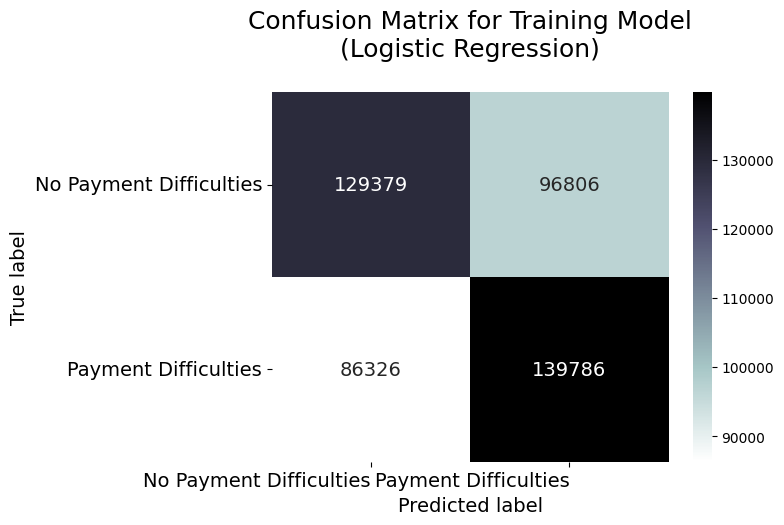

In [84]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_predict)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()


In [85]:
# predict data test
y_test_pred_log = lreg_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.60      0.57      0.59     56501
           1       0.59      0.62      0.60     56574

    accuracy                           0.59    113075
   macro avg       0.59      0.59      0.59    113075
weighted avg       0.59      0.59      0.59    113075



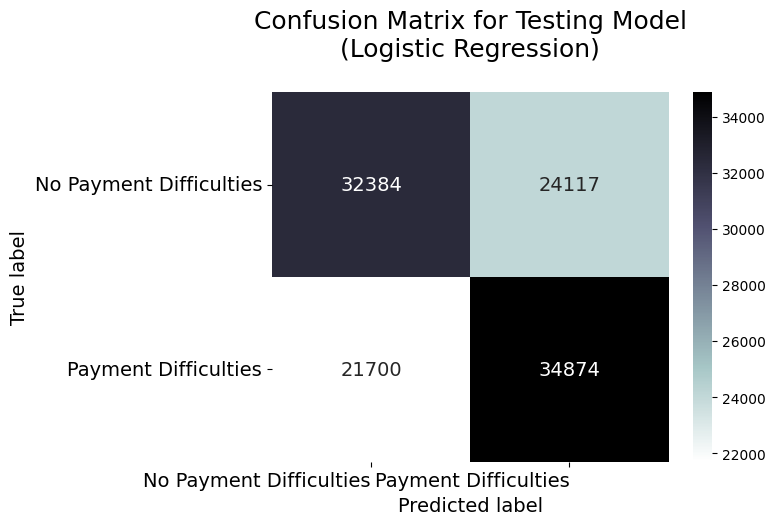

In [86]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [88]:
acc_log_train=round(lreg_model.score(X_train,y_train)*100,2)
acc_log_test=round(lreg_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 59.51
Test Accuracy: % 59.48


## Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
# train the model
dtree_model = DecisionTreeClassifier().fit(X_train,y_train)
print(dtree_model)

DecisionTreeClassifier()


In [92]:
# predict data train
y_train_pred_dt = dtree_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226185
           1       1.00      1.00      1.00    226112

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



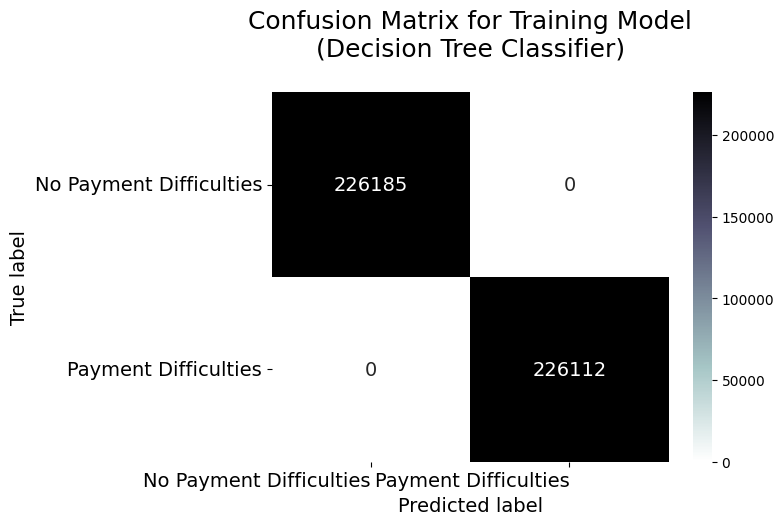

In [93]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [95]:
# predict data test
y_test_pred_dt = dtree_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred_dt))

Classification Report Testing Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.76      0.90      0.82     56501
           1       0.88      0.71      0.79     56574

    accuracy                           0.81    113075
   macro avg       0.82      0.81      0.81    113075
weighted avg       0.82      0.81      0.81    113075



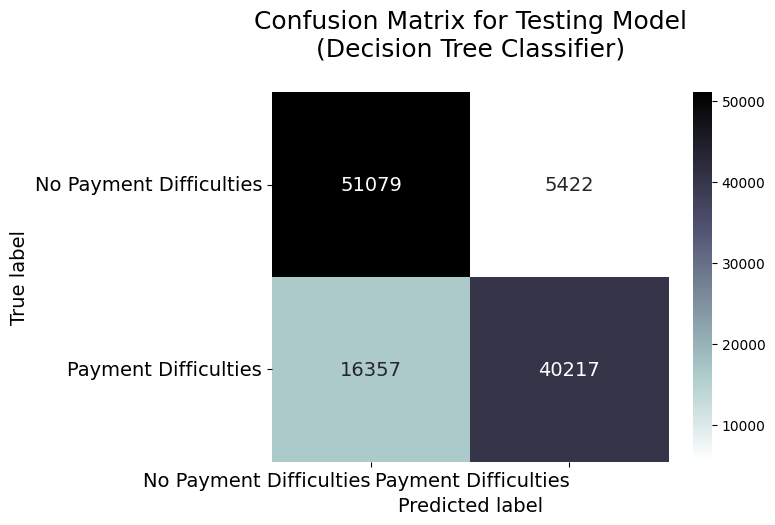

In [96]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [98]:
acc_dt_train=round(dtree_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dtree_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_dt_train))
print("Test Accuracy: % {}".format(acc_dt_test))

Training Accuracy: % 100.0
Test Accuracy: % 80.74


## MODEL SELECTION

In [101]:
results = pd.DataFrame([["Logistic Regression", 0.5951, 0.5948],
                       ["Decision Tree", 1, 0.8074]],
                        columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score"])

results.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False)


,Models,Training Accuracy Score,Testing Accuracy Score
1,Decision Tree,1.0000,0.8074
0,Logistic Regression,0.5951,0.5948


#PREDICTION

In [108]:
# data application (test)
df_test = pd.read_csv('/content/drive/MyDrive/Dataset/Home Credit/application_test.csv', sep=',')
print('This dataset has %d rows dan %d columns.\n' % df_test.shape)
df_test.head()

This dataset has 48744 rows dan 121 columns.



,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Check for duplicates

In [109]:
print('Total Unique ID from the dataset is :', df_test['SK_ID_CURR'].nunique())

Total Unique ID from the dataset is : 48744


## Check for Missing Value

In [122]:
# check for missing value
null = pd.DataFrame(df_test.isnull().sum(), columns=['Total Missing Values']).reset_index()
null['Percentage'] = (null['Total Missing Values']/df_test.shape[0])*100
null['Percentage'] = null['Percentage'].round(2)
null.sort_values(by=['Percentage'], ascending=False)

,index,Total Missing Values,Percentage
40,EXT_SOURCE_3,8668,17.78
71,AMT_REQ_CREDIT_BUREAU_YEAR,6049,12.41
70,AMT_REQ_CREDIT_BUREAU_QRT,6049,12.41
69,AMT_REQ_CREDIT_BUREAU_MON,6049,12.41
68,AMT_REQ_CREDIT_BUREAU_WEEK,6049,12.41
...,...,...,...
24,FLAG_PHONE,0,0.00
23,FLAG_CONT_MOBILE,0,0.00
22,FLAG_WORK_PHONE,0,0.00
21,FLAG_EMP_PHONE,0,0.00


In [113]:
# Drop column that has 40% missing value
data = list(null[null['Percentage'] > 40]['index'])
df_test = df_test.drop(columns = data)

In [124]:
# Check after columns drop
null = pd.DataFrame(df_test.isnull().sum(), columns=['Total Missing Values']).reset_index()
null['Percentage'] = (null['Total Missing Values']/df_test.shape[0])*100
null['Percentage'] = null['Percentage'].round(2)
null.sort_values(by=['Percentage'], ascending=False)

,index,Total Missing Values,Percentage
40,EXT_SOURCE_3,8668,17.78
71,AMT_REQ_CREDIT_BUREAU_YEAR,6049,12.41
70,AMT_REQ_CREDIT_BUREAU_QRT,6049,12.41
69,AMT_REQ_CREDIT_BUREAU_MON,6049,12.41
68,AMT_REQ_CREDIT_BUREAU_WEEK,6049,12.41
...,...,...,...
24,FLAG_PHONE,0,0.00
23,FLAG_CONT_MOBILE,0,0.00
22,FLAG_WORK_PHONE,0,0.00
21,FLAG_EMP_PHONE,0,0.00


In [125]:
# impute missing values with median because the data is skewed for numerical features
# impute missing values with mode for categorical features

category_columns = df_test.select_dtypes(include=['object']).columns.tolist()
integer_columns = df_test.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_test:
    if df_test[column].isnull().any():
        if(column in category_columns):
            df_test[column]=df_test[column].fillna(df_test[column].mode()[0])
        else:
            df_test[column]=df_test[column].fillna(df_test[column].median())

In [126]:
# after imputation
print('Missing values status:', df_test.isnull().values.any())
tvc = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
tvc['Percentage'] = (tvc['Total Null Values']/df_test.shape[0])*100
tvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: False


,index,Total Null Values,Percentage
0,SK_ID_CURR,0,0.0
1,NAME_CONTRACT_TYPE,0,0.0
2,FLAG_DOCUMENT_8,0,0.0
3,FLAG_DOCUMENT_7,0,0.0
4,FLAG_DOCUMENT_6,0,0.0
...,...,...,...
67,FLAG_CONT_MOBILE,0,0.0
68,FLAG_WORK_PHONE,0,0.0
69,FLAG_EMP_PHONE,0,0.0
70,FLAG_MOBIL,0,0.0


In [127]:
# label encoder for object features
df_test[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = df_test[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)


In [128]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [129]:
# Change Columns that had negative value to absolute (no negative value)
df_test[['DAYS_BIRTH',
         'DAYS_EMPLOYED',
         'DAYS_ID_PUBLISH',
         'DAYS_REGISTRATION',
         'DAYS_LAST_PHONE_CHANGE']] = df_test[['DAYS_BIRTH',
         'DAYS_EMPLOYED',
         'DAYS_ID_PUBLISH',
         'DAYS_REGISTRATION',
         'DAYS_LAST_PHONE_CHANGE']].abs()

## Prediction Test

In [132]:
pred_test = df_test[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION',
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY',
                           'ORGANIZATION_TYPE']]
pred_test.head()

,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT,DAYS_BIRTH,AMT_INCOME_TOTAL,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_ANNUITY,ORGANIZATION_TYPE
0,2329,450000.0,568800.0,19241,135000.0,5170.0,1740.0,812,20560.5,28
1,4469,180000.0,222768.0,18064,99000.0,9118.0,0.0,1623,17370.0,42
2,4458,630000.0,663264.0,20038,202500.0,2175.0,856.0,3503,69777.0,54
3,1866,1575000.0,1575000.0,13976,315000.0,2000.0,1805.0,4208,49018.5,5
4,2191,625500.0,625500.0,13040,180000.0,4000.0,821.0,4262,32067.0,5


In [134]:
# lets predict!
predict = pd.Series(lreg_model.predict(pred_test), name = "TARGET").astype(int)
results = pd.concat([df_test['SK_ID_CURR'], predict],axis = 1)
results.to_csv("predict application.csv", index = False)
results.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,SK_ID_CURR,TARGET
0,100001,1
1,100005,1
2,100013,0
3,100028,0
4,100038,0


# Action Recommendation


* Need further analysis, there's a lot of feature that hasnt been analyzed
* Clients who have no payment difficulties are clients in the range of 35-45 years old. Prioritize the clients at this age range.

